## Motivating Info/Questions
- We have two friendship networks (YelpFriendsBig and yelpinho). Yelpinho is a subnetwork of YelpFriendsBig and contains all users for which we have data.
- Can we make analyze yelpinho, a much smaller network, and make the same insights on the larger friendship network?

## Goals
- Our goal is to use yelpinho, a subnetwork, to make insights on YelpFriendsBig. To make these insights, we must verify two criteria: the structure of both networks are the same and the spearman rank correlation.


In [1]:
import powerlaw
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import json  
import networkx as nx

In [2]:
yelpinho = nx.read_edgelist("friendsSubNetworkEdges_InfoAvailable.txt")

In [6]:
YelpFriendsBig = nx.read_edgelist("friendsFullNetworkEdges_PartialInfoAvailable.txt")

In [7]:
YelpFriendsBig.is_directed()

False

In [6]:
# various degree comparisons 
def fitCompare(myFit):
    print ('power_law Vs exponential: ', myFit.distribution_compare('power_law', 'exponential'))
    print ('power_law Vs truncated_power_law:  ', myFit.distribution_compare('power_law', 'truncated_power_law'))
    print ('power_law Vs stretched_exponential:  ', myFit.distribution_compare('power_law', 'stretched_exponential'))
    print ('truncated_power_law Vs exponential:  ', myFit.distribution_compare('truncated_power_law', 'exponential' ))
    print ('truncated_power_law Vs stretched_exponential:  ', myFit.distribution_compare('truncated_power_law', 'stretched_exponential'))
    print ('exponential Vs stretched_exponential:  ', myFit.distribution_compare('exponential', 'stretched_exponential'))

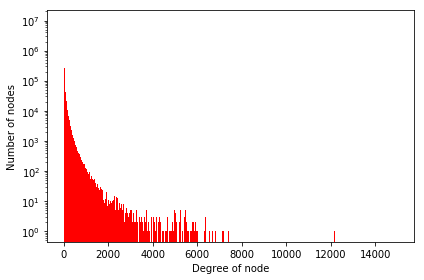

In [7]:
# degree distribution of YelpFriendsBig

deg = YelpFriendsBig.degree
x1= [d[1] for d in list(deg)]
YelpFriendsBig.size()
y = 800
fig, ax = plt.subplots()
ax.set_facecolor('xkcd:white')
plt.xlabel("Degree of node")
plt.ylabel("Number of nodes")
plt.hist(x1, bins = 800, facecolor = 'red',log=True)
plt.tight_layout()
plt.show()
fig.savefig('DegreeDistLargerGRAPH.jpg')

In [8]:
# distribution comparisons for YelpFriendsBig

fit1 = powerlaw.Fit(x1, discrete=False)
fitCompare(fit1)

Calculating best minimal value for power law fit
/home/jbowllan/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power_law Vs exponential:  (892.3033113349079, 5.786461669738009e-59)


Assuming nested distributions


power_law Vs truncated_power_law:   (-4.329514689707876, 0.00325444606037395)
power_law Vs stretched_exponential:   (14.41870730328058, 0.011933454357250455)
truncated_power_law Vs exponential:   (896.6328260246017, 7.240605491392539e-63)
truncated_power_law Vs stretched_exponential:   (18.74822199298894, 5.061594785693643e-06)
exponential Vs stretched_exponential:   (-877.884604031632, 0.0)


Assuming nested distributions


No handles with labels found to put in legend.


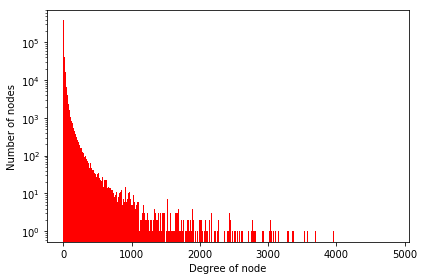

In [9]:
# degree distribution of yelpinho

deg2 = yelpinho.degree
x2= [d[1] for d in list(deg2)]
# x = deg
y = 800
fig, ax = plt.subplots()
ax.set_facecolor('xkcd:white')
plt.xlabel("Degree of node")
plt.ylabel("Number of nodes")
plt.title("")
plt.hist(x2, bins = 800, facecolor = 'red',log=True)
plt.legend(loc = 'best', frameon = False)

plt.tight_layout()
plt.show()
fig.savefig('DegreeDistSUBGRAPH.jpg')

In [10]:
# distribution comparisons for yelpinho

fit2 = powerlaw.Fit(x2, discrete=False)
fitCompare(fit2)

Calculating best minimal value for power law fit
/home/jbowllan/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


power_law Vs exponential:  (744.1210149037037, 5.481031493766175e-46)


Assuming nested distributions


power_law Vs truncated_power_law:   (-43.6305747796969, 0.0)
power_law Vs stretched_exponential:   (-32.37405676318039, 2.5589344907941544e-07)
truncated_power_law Vs exponential:   (787.7515896834242, 4.091731069825498e-63)
truncated_power_law Vs stretched_exponential:   (11.256518016516962, 3.669761819048249e-15)
exponential Vs stretched_exponential:   (-776.4950716668733, 0.0)


Assuming nested distributions


/home/jbowllan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


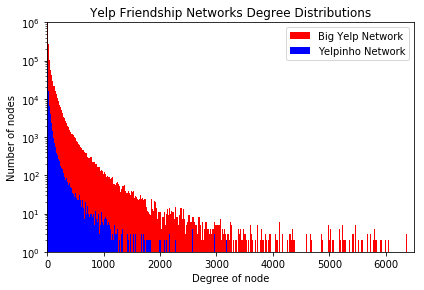

In [21]:
# degree distributions for YelpFriendsBig and yelpinho on same graph

deg = YelpFriendsBig.degree
deg2 = yelpinho.degree

x1= [d[1] for d in list(deg)]
x2= [d[1] for d in list(deg2)]
y = 800

fig, ax = plt.subplots()


ax.set_facecolor('xkcd:white')
plt.xlabel("Degree of node")
plt.ylabel("Number of nodes")
plt.hist(x1, bins = 800, facecolor = 'red',log=True)
plt.hist(x2, bins = 800, facecolor = 'blue',log=True)
ax.set_xlim([0, 6500])
ax.set_ylim([0, 10**6])
legend = ['Big Yelp Network', 'Yelpinho Network']
plt.legend(legend)
plt.tight_layout()
plt.title("Yelp Friendship Networks Degree Distributions")
plt.savefig('TechReportFigures/FriendDegreeDistributions/FriendDegreeDistributions.png',format="png")
plt.savefig('TechReportFigures/FriendDegreeDistributions/FriendDegreeDistributions.svg',format="svg")
plt.savefig('TechReportFigures/FriendDegreeDistributions/FriendDegreeDistributions.jpg',format="jpg")
plt.show()



In [1]:
#spearman rank correlation appears in paper